# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir('/Users/maheshkonduru/Documents/DATA SCIENCE/Machine Learning /Supervised Machine learning/SUPERVISED PROJECT/heart disease prediction')

In [3]:
os.getcwd()

'/Users/maheshkonduru/Documents/DATA SCIENCE/Machine Learning /Supervised Machine learning/SUPERVISED PROJECT/heart disease prediction'

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory data analysis

In [8]:
df.shape

(303, 14)

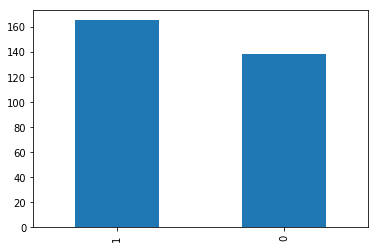

In [9]:
df['target'].value_counts().plot.bar()

# Five point summary of numerical attributes

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


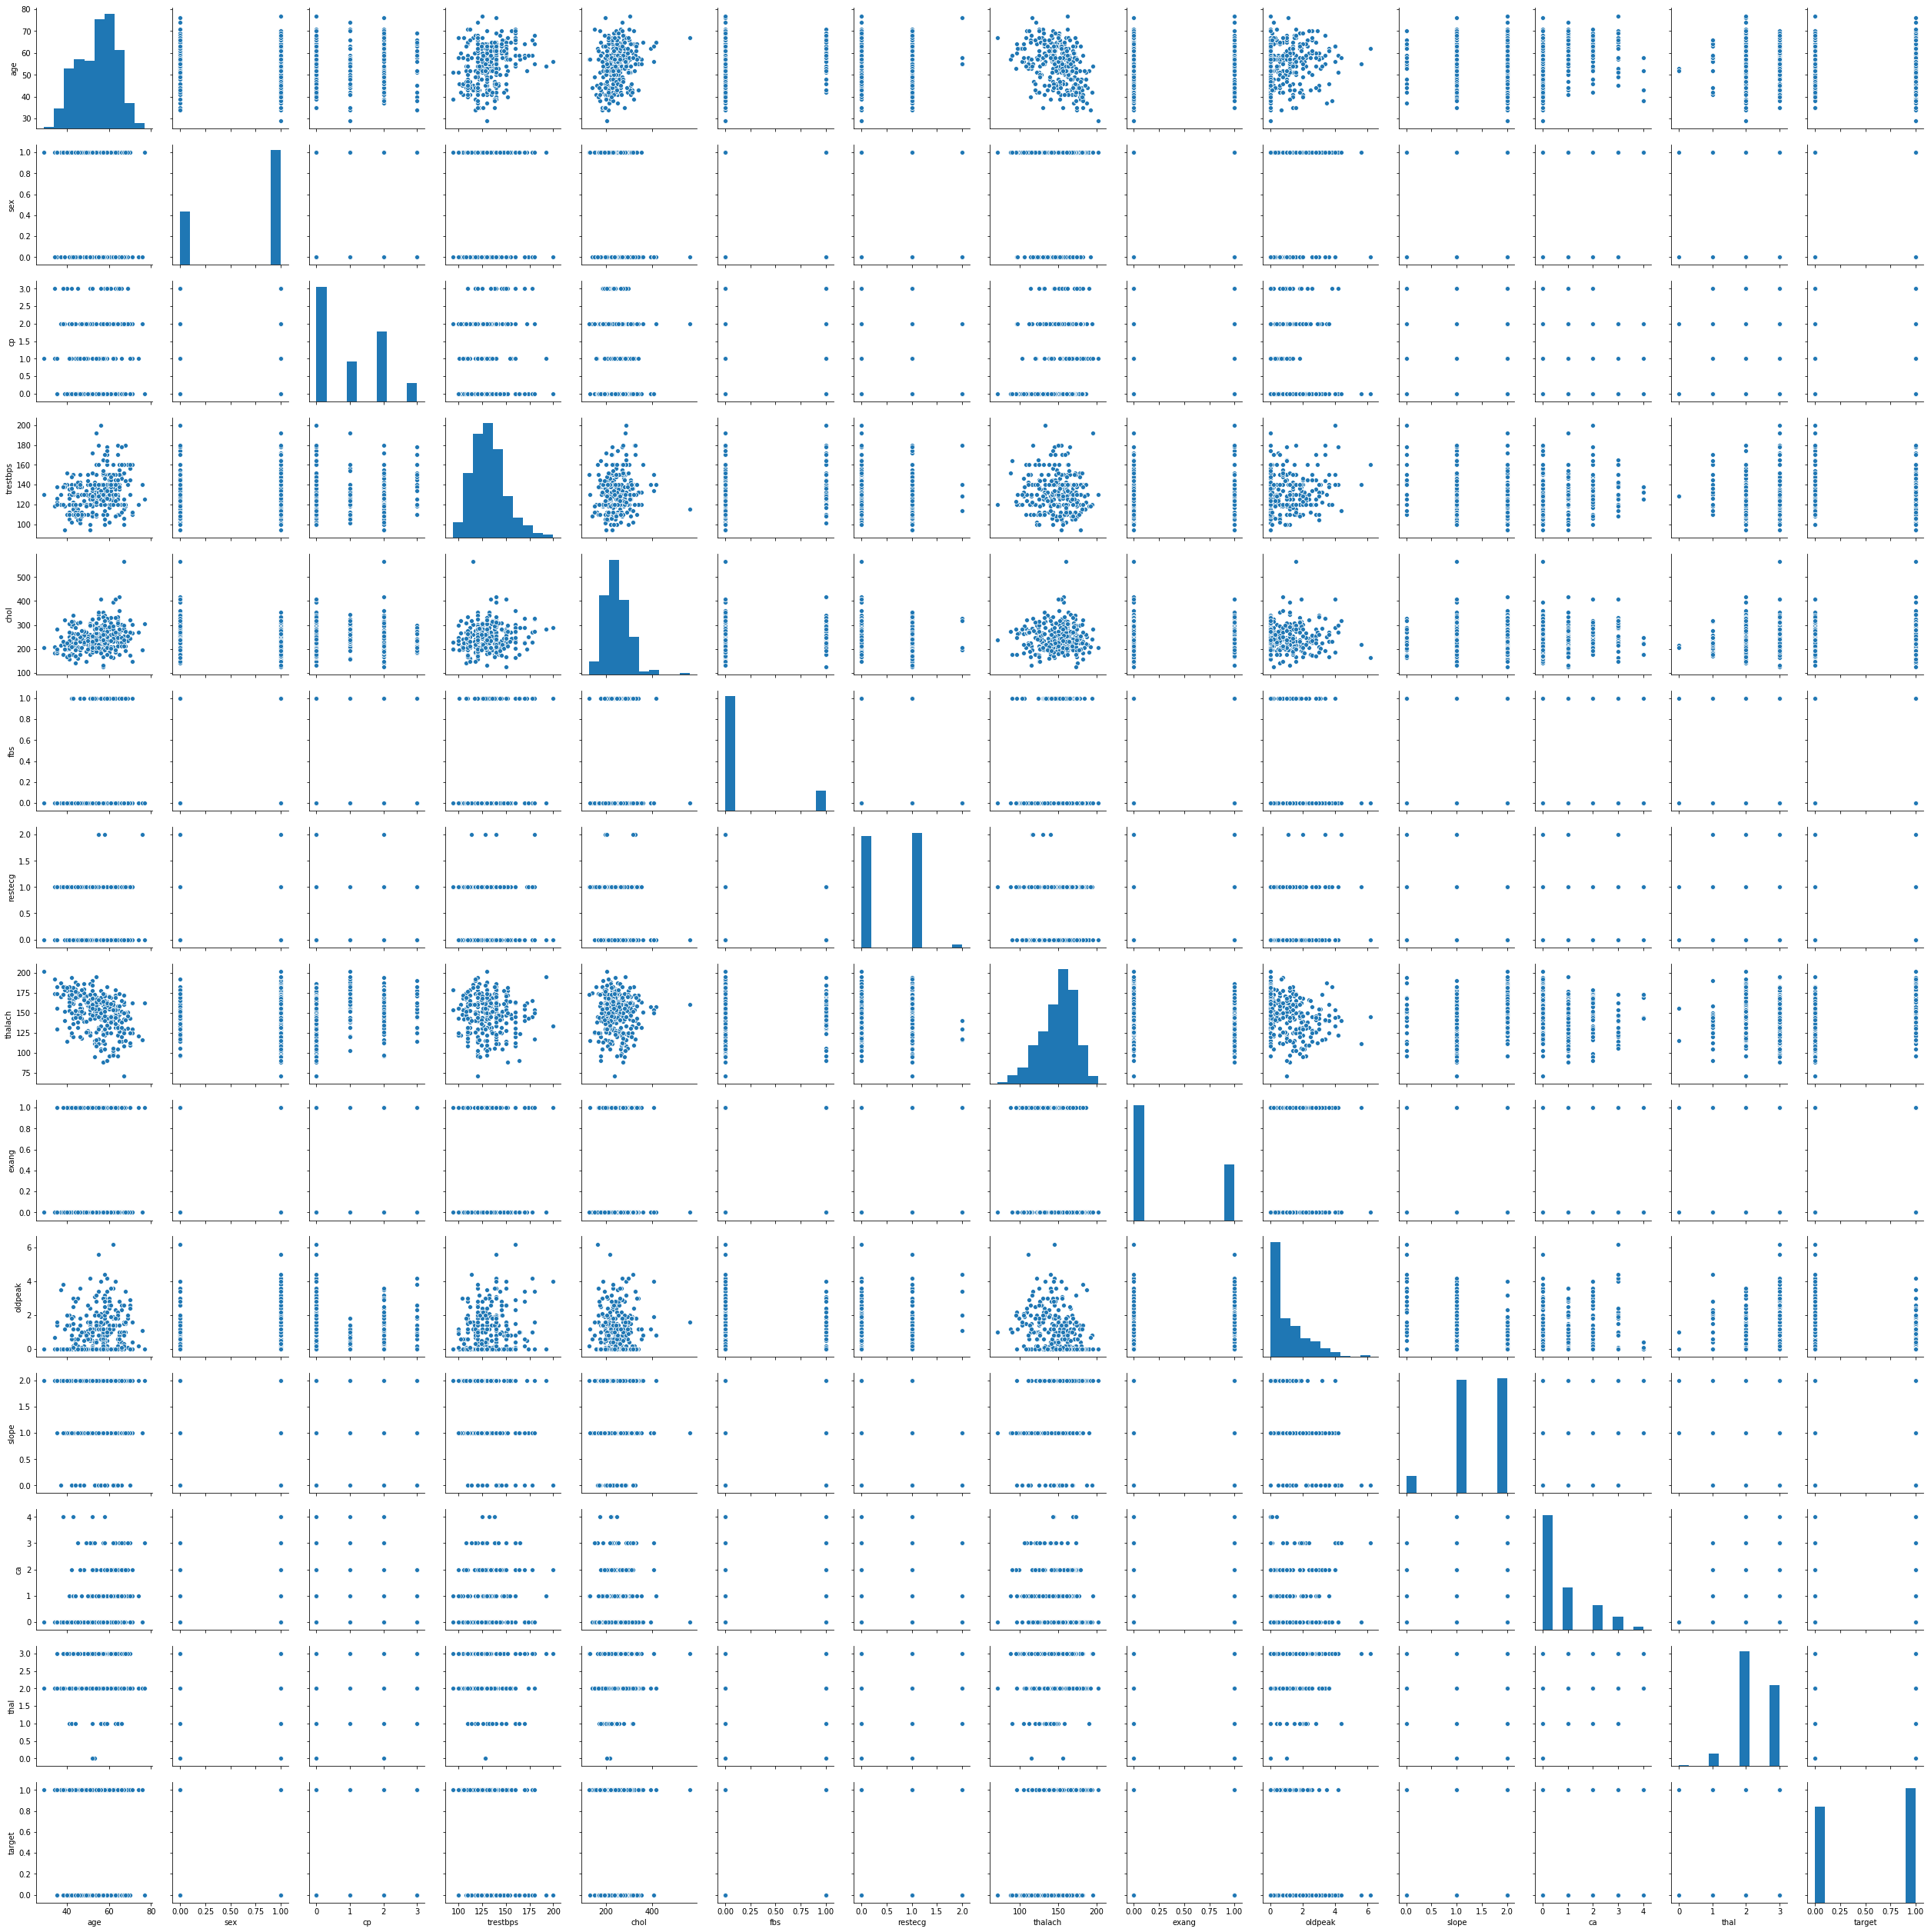

In [11]:
sns.pairplot(df)
plt.show()

# Feature selection 

# Categorical features

In [12]:
from sklearn.feature_selection import SelectKBest,chi2

In [13]:
X = df[['sex','cp','fbs','restecg','exang','slope','ca','thal']]

In [14]:
y =df['target']

In [15]:
best_cat = SelectKBest(chi2,k=5)

In [16]:
X_new = best_cat.fit_transform(X,y)

In [17]:
cols = best_cat.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
features_df_new = X.columns[cols]


In [18]:
features_df_new

Index(['sex', 'cp', 'exang', 'slope', 'ca'], dtype='object')

# Correlation matrix

In [19]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']

In [20]:
df2 = df[num_cols]

In [21]:
corrmat = df2.corr()

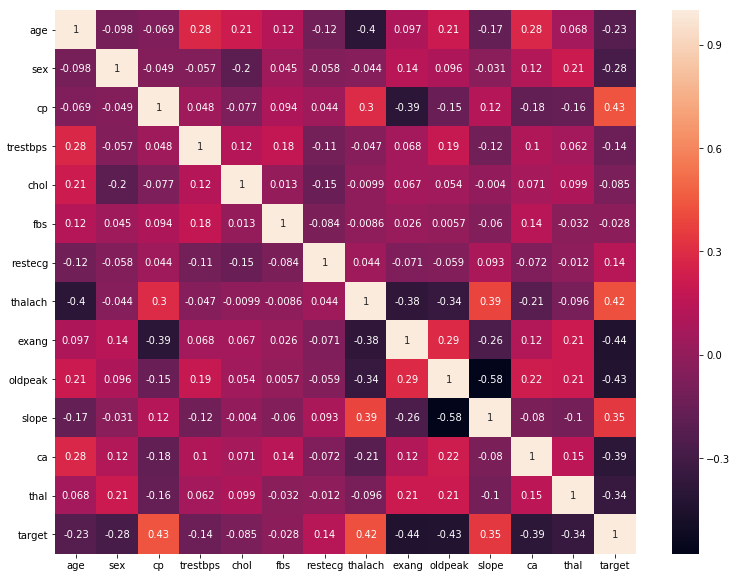

In [22]:
plt.figure(figsize=(13,10))
sns.heatmap(corrmat,annot=True)
plt.show()

In [23]:
def get_correlation(data,threshold):
    corr_col = set()
    corrmat = df2.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                col_name = corrmat.columns[i]
                corr_col.add(col_name)
                
    return corr_col   

In [24]:
corr_features = get_correlation(df2,0.85)

In [25]:
corr_features

set()

# There is no multicollinearity in the  features

# One hot encoding 

In [26]:
cat_cols = ['sex', 'cp', 'exang', 'slope', 'ca']

In [37]:
data_ohehot = pd.get_dummies(df,columns=['sex', 'cp', 'exang', 'slope', 'ca'],drop_first=True)

In [43]:
data_ohehot.head()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,thal,target,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4
0,63,145,233,1,0,150,2.3,1,1,1,0,0,1,0,0,0,0,0,0,0
1,37,130,250,0,1,187,3.5,2,1,1,0,1,0,0,0,0,0,0,0,0
2,41,130,204,0,0,172,1.4,2,1,0,1,0,0,0,0,1,0,0,0,0
3,56,120,236,0,1,178,0.8,2,1,1,1,0,0,0,0,1,0,0,0,0
4,57,120,354,0,1,163,0.6,2,1,0,0,0,0,1,0,1,0,0,0,0


In [41]:
data = data_ohehot.drop(['thal','fbs','restecg'],axis=1)

# ['thal','fbs','restecg']
# Dropped these categorical features which are not important

In [42]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4
0,63,145,233,150,2.3,1,1,0,0,1,0,0,0,0,0,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,1,0,0,0,0
3,56,120,236,178,0.8,1,1,1,0,0,0,0,1,0,0,0,0
4,57,120,354,163,0.6,1,0,0,0,0,1,0,1,0,0,0,0


# Data Preprocessing

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
features_to_scale = ['age','trestbps','chol','thalach','oldpeak']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [47]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,0,0,0,0,0,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,0,0,0,0,0,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,0,0,1,0,0,0,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,0,0,1,0,0,0,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,1,0,1,0,0,0,0


# Model Building

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [49]:
X = data.drop(columns= ['target'],axis=1)
y = data['target']



In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [51]:
X_train.shape,y_train.shape

((212, 16), (212,))

# KNearest Neighbour classifier

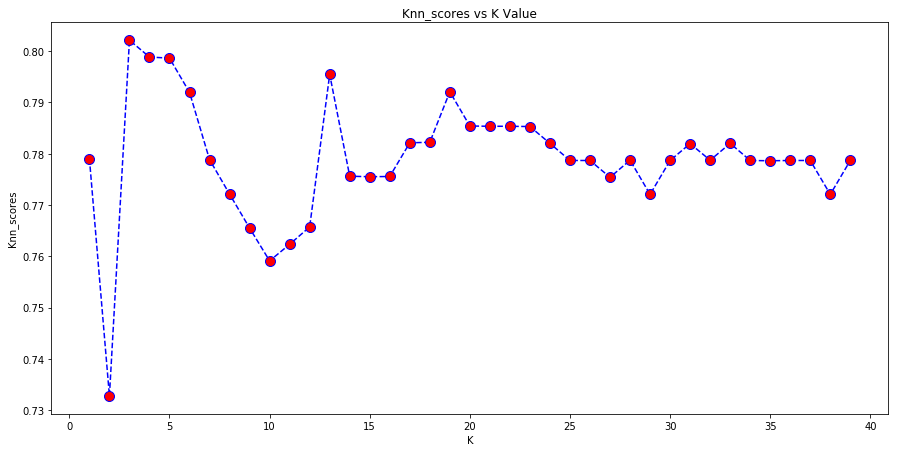

In [58]:
knn_scores = []
error_rates = []
for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors = i)
        score = cross_val_score(knn,X,y,cv=5)
        knn_scores.append(score.mean())
        error_rates.append(100-score.mean())
        
plt.figure(figsize = (15, 7.2))
plt.plot(range(1, 40), knn_scores, color = 'blue', linestyle = 'dashed', marker = 'o', 
             markerfacecolor = 'red', markersize = 10)
plt.title('Knn_scores vs K Value')
plt.xlabel('K')
plt.ylabel('Knn_scores')
plt.show()


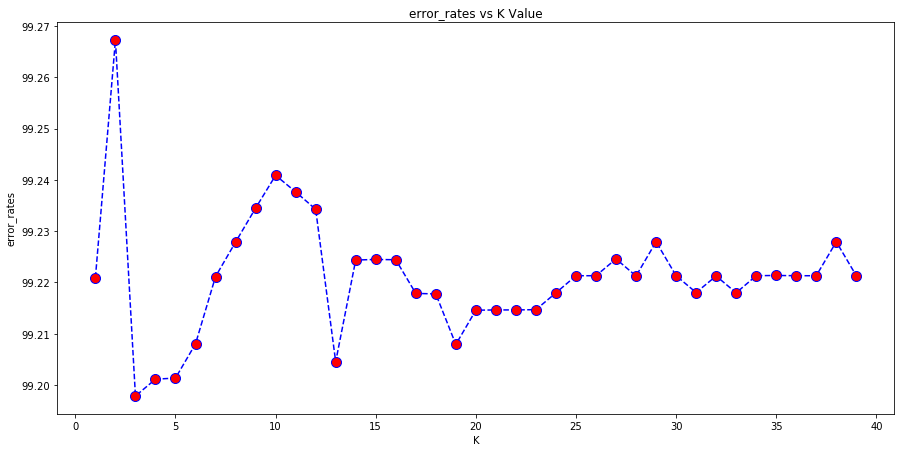

In [59]:
plt.figure(figsize = (15, 7.2))
plt.plot(range(1, 40), error_rates, color = 'blue', linestyle = 'dashed', marker = 'o', 
             markerfacecolor = 'red', markersize = 10)
plt.title('error_rates vs K Value')
plt.xlabel('K')
plt.ylabel('error_rates')
plt.show()

In [61]:
model = KNeighborsClassifier(n_neighbors=3)

In [62]:
# fit the model
model.fit(X_train, y_train)

# Get predictions
y_true, y_pred = y_test, model.predict(X_test)

# Evaluate train and test scores
train_ = model.score(X_train, y_train)
test_ = model.score(X_test, y_test)
                      

In [65]:
# Other scores
accuracy = accuracy_score(y_true, y_pred).round(3)
            
precision = precision_score(y_true, y_pred).round(3)
            
recall = recall_score(y_true, y_pred).round(3)

In [66]:
print('-'*20)
print('Training Score: {0:.3f}'.format(train_))
print('Test Score: {0:.3f}'.format(test_))
            
print('Accuracy Score: {0:.3f}'.format(accuracy))
print('Precision Score : {0:.3f}'.format(precision))
print('Recall Score : {0:.3f}'.format(recall))

--------------------
Training Score: 0.873
Test Score: 0.802
Accuracy Score: 0.802
Precision Score : 0.717
Recall Score : 0.927


# Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gbc_model = GradientBoostingClassifier(n_estimators = 50)


In [70]:
# fit the model
gbc_model.fit(X_train, y_train)

# Get predictions
y_true, y_pred = y_test, gbc_model.predict(X_test)

# Evaluate train and test scores
train_ = gbc_model.score(X_train, y_train)
test_ = gbc_model.score(X_test, y_test)
                      

In [71]:
# Other scores
accuracy = accuracy_score(y_true, y_pred).round(3)
            
precision = precision_score(y_true, y_pred).round(3)
            
recall = recall_score(y_true, y_pred).round(3)

In [72]:
print('-'*20)
print('Training Score: {0:.3f}'.format(train_))
print('Test Score: {0:.3f}'.format(test_))
            
print('Accuracy Score: {0:.3f}'.format(accuracy))
print('Precision Score : {0:.3f}'.format(precision))
print('Recall Score : {0:.3f}'.format(recall))

--------------------
Training Score: 0.972
Test Score: 0.791
Accuracy Score: 0.791
Precision Score : 0.704
Recall Score : 0.927
